In [ ]:
import pandas as pd

In [ ]:
!pip install auto-ts==0.0.38


     |████████████████████████████████| 90 kB 6.0 MB/s 
     |████████████████████████████████| 1.0 MB 37.2 MB/s 
     |████████████████████████████████| 1.4 MB 34.2 MB/s 
     |████████████████████████████████| 132 kB 41.0 MB/s 
     |████████████████████████████████| 9.8 MB 37.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [ ]:
from auto_ts import auto_timeseries


Imported auto_timeseries version:0.0.37. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [ ]:
df = pd.read_csv("Apple_Nasd.csv")
df.head()

,Date,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate
0,2012-07-02,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25
1,2012-07-03,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25
2,2012-07-05,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25
3,2012-07-06,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25
4,2012-07-09,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25


In [ ]:
df1=df.drop(columns='Date')
df1.head()

,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate
0,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25
1,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25
2,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25
3,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25
4,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25


In [ ]:
import datetime
import pandas as pd
dti = pd.date_range("2012-07-02 00:00:00", periods=2328, freq="B", name="day")
dti=pd.DataFrame(dti)
dti.head(10)


,day
0,2012-07-02
1,2012-07-03
2,2012-07-04
3,2012-07-05
4,2012-07-06
5,2012-07-09
6,2012-07-10
7,2012-07-11
8,2012-07-12
9,2012-07-13


In [ ]:
df1=pd.concat([dti,df1],axis=1)

In [ ]:
df1.head()

,day,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate
0,2012-07-02,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25
1,2012-07-03,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25
2,2012-07-04,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25
3,2012-07-05,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25
4,2012-07-06,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25


In [ ]:
model = auto_timeseries( score_type='rmse', seasonality=True, model_type='best', verbose=2)

In [ ]:
train_size=int(len(df1)*.8)
train_size

1862

In [ ]:
tr_df, te_df = df1[:train_size], df1[train_size +1:]
tr_df.shape, te_df.shape



((1862, 21), (465, 21))

In [ ]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   day                1862 non-null   datetime64[ns]
 1   Appl_Open          1862 non-null   float64       
 2   Appl_High          1862 non-null   float64       
 3   Appl_Low           1862 non-null   float64       
 4   Appl_Close         1862 non-null   float64       
 5   Appl_Adj_Close     1862 non-null   float64       
 6   Appl_Volume        1862 non-null   int64         
 7   Appl_Diff          1862 non-null   float64       
 8   Appl_Diff_Percent  1862 non-null   float64       
 9   Appl_EPS           1862 non-null   float64       
 10  Nasd_Open          1862 non-null   float64       
 11  Nasd_High          1862 non-null   float64       
 12  Nasd_Low           1862 non-null   float64       
 13  Nasd_Close         1862 non-null   float64       
 14  Nasd_Adj

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |      0.8282525884378058      |
|           p-value           |      0.9920787974459628      |
|          #Lags Used         |             0.0              |
| Number of Observations Used |            1861.0            |
|     Critical Value (1%)     |     -3.4338687226315336      |
|     Critical Value (5%)     |      -2.863094318475046      |
|     Critical Value (10%)    |     -2.5675974634086765      |
+-----------------------------+------------------------------+
 this series is non-stationary. Trying test again after differencing...
After differencing=1, results of Augmented Dickey-Fuller Test:
+-----------------

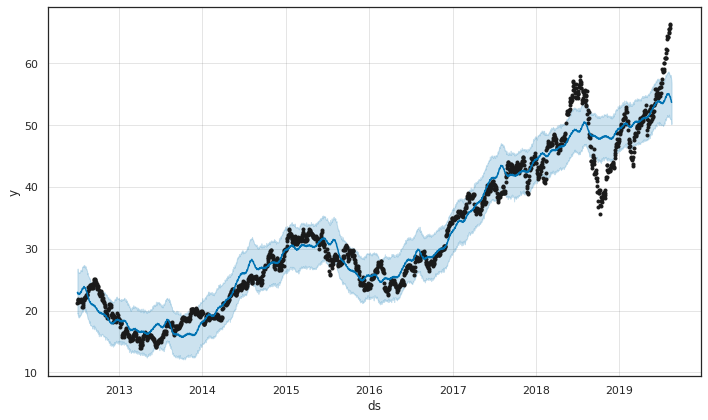

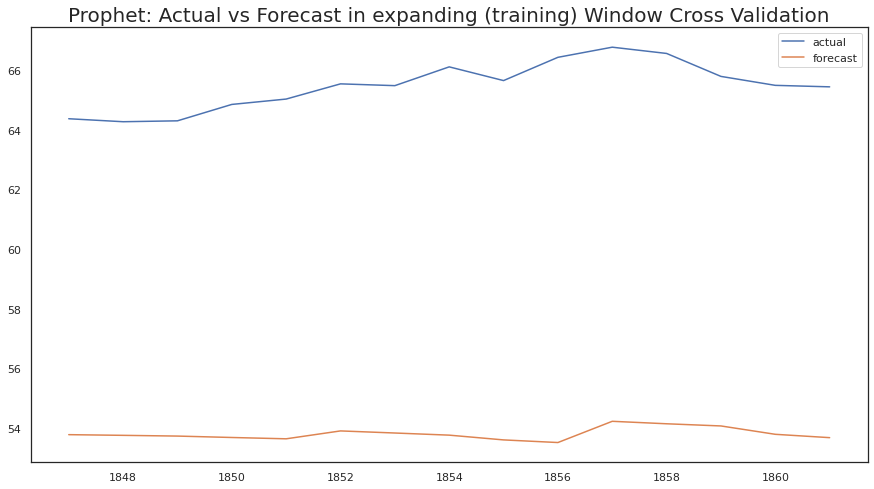

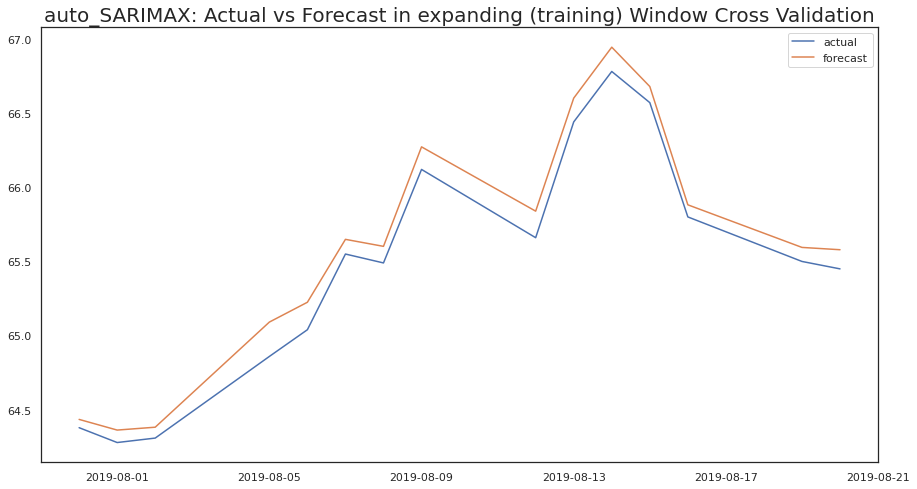

In [ ]:
model.fit(traindata= tr_df, ts_column="day", target="Appl_Close", cv=3)



1.   List item
2.   List item




In [ ]:
model.get_leaderboard()

,name,rmse
1,auto_SARIMAX,0.135452
0,Prophet,11.676362
2,ML,inf


In [ ]:

model.get_model("auto_SARIMAX").summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Appl_Close   No. Observations:                 1862
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                3021.087
Date:                              Wed, 15 Dec 2021   AIC                          -5990.174
Time:                                      05:14:01   BIC                          -5846.789
Sample:                                  07-02-2012   HQIC                         -5937.296
                                       - 08-20-2019                                         
Covariance Type:                                opg                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -0.0001   9.01e-07   -122.285      0.000      -0.000      -0.000
drift              -4.77e-06   4.28e-07    -11.157      0.000   -5.61e-06   -3.93e-06
Appl_Open            -0.0235   1.75e-06  -1.34e+04      0.000      -0.024      -0.024
Appl_High             0.1568   2.19e-06   7.15e+04      0.000       0.157       0.157
Appl_Low              0.0959   2.14e-06   4.48e+04      0.000       0.096       0.096
Appl_Adj_Close        0.8065   1.31e-06   6.13e+05      0.000       0.806       0.806
Appl_Volume        -4.62e-11   1.19e-11     -3.884      0.000   -6.95e-11   -2.29e-11
Appl_Diff             0.0636   1.27e-06      5e+04      0.000       0.064       0.064
Appl_Diff_Percent     0.0026   1.28e-06   2013.700      0.000       0.003       0.003
Appl_EPS             -0.0028   1.31e-07  -2.16e+04      0.000      -0.003      -0.003
Nasd_Open             0.0002   4.42e-05      4.216      0.000    9.97e-05       0.000
Nasd_High            -0.0011   5.75e-05    -19.384      0.000      -0.001      -0.001
Nasd_Low             -0.0007   4.97e-05    -13.324      0.000      -0.001      -0.001
Nasd_Close            0.0008   2.79e-05     28.716      0.000       0.001       0.001
Nasd_Adj_Close        0.0008   2.79e-05     28.716      0.000       0.001       0.001
Nasd_Volume        2.568e-12    4.7e-12      0.546      0.585   -6.65e-12    1.18e-11
Nasd_Diff            -0.0004   2.94e-05    -14.448      0.000      -0.000      -0.000
Nasd_Diff_Percent    -0.0004   9.89e-07   -449.423      0.000      -0.000      -0.000
Nasd_EPS              0.0162   1.12e-07   1.45e+05      0.000       0.016       0.016
Unempl_rate           0.0764   1.39e-08    5.5e+06      0.000       0.076       0.076
Bank_int_rate         0.0853   3.92e-08   2.18e+06      0.000       0.085       0.085
ar.L1                 0.8566   6.36e-08   1.35e+07      0.000       0.857       0.857
ma.L1                -0.3787   6.24e-08  -6.07e+06      0.000      -0.379      -0.379
ma.L2                -0.0022   2.99e-08  -7.46e+04      0.000      -0.002      -0.002
ma.S.L12             -0.4195   9.46e-08  -4.43e+06      0.000      -0.420      -0.420
sigma2                0.0028   8.56e-05     32.670      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   4.02   Jarque-Bera (JB):               796.69
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matri